<a href="https://colab.research.google.com/github/emma-r-chua/Entropy-Paper-Code/blob/main/Entropy_Paper_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

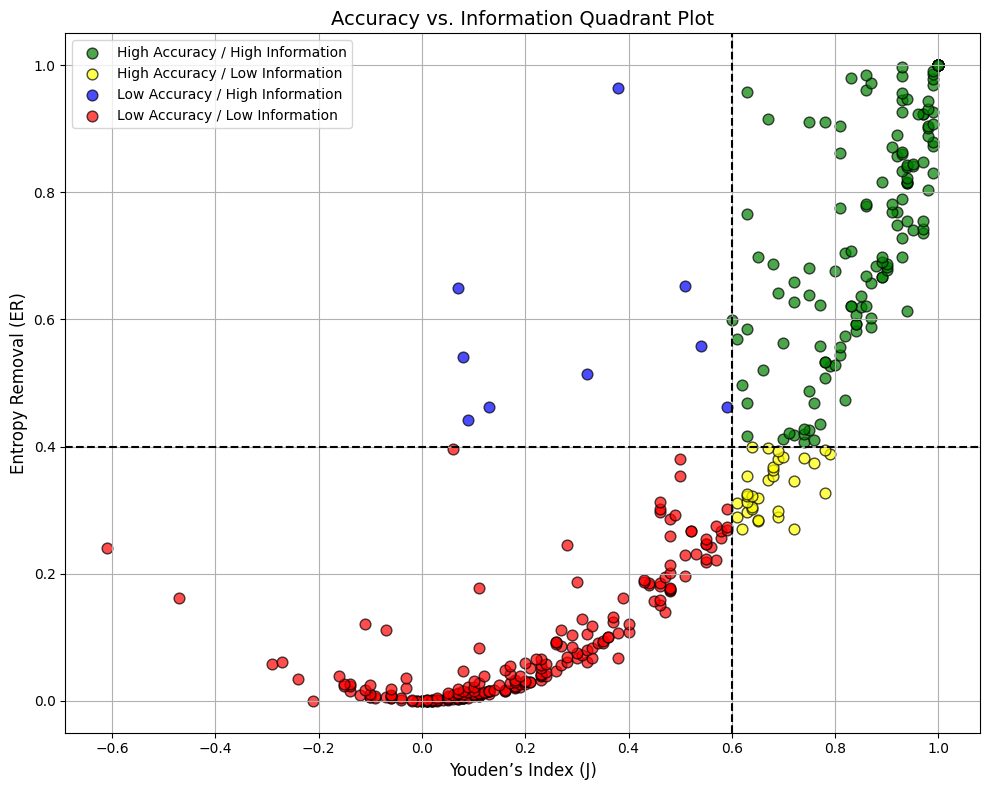

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
#Replace name "" below with path to your own excel file; Confusion Matrix Spreadsheet.xlsx was mine.
df = pd.read_excel("Confusion Matrix Spreadsheet.xlsx")
#Fix columns below according to your own
df = df.rename(columns={
    'Symptom/Study': 'Finding',
    'RE': 'ER',
    'J': 'J_value'
})
#These below were our outlined parameters. Youden's Index at 0.6, and Entropy Removal at 0.4. Change if your parameters are different.
#Change legend labels here if you would like.
def classify_quadrant(row):
    if row['J_value'] >= 0.60 and row['ER'] >= 0.40:
        return 'High Accuracy / High Information'
    elif row['J_value'] >= 0.60 and row['ER'] < 0.40:
        return 'High Accuracy / Low Information'
    elif row['J_value'] < 0.60 and row['ER'] >= 0.40:
        return 'Low Accuracy / High Information'
    else:
        return 'Low Accuracy / Low Information'

#Change legend labels and colors if you would like.
df['Quadrant'] = df.apply(classify_quadrant, axis=1)
colors = {
    'High Accuracy / High Information': 'green',
    'High Accuracy / Low Information': 'yellow',
    'Low Accuracy / High Information': 'blue',
    'Low Accuracy / Low Information': 'red'
}
fig, ax = plt.subplots(figsize=(10, 8))

for quadrant, group in df.groupby('Quadrant'):
    ax.scatter(
        group['J_value'], group['ER'],
        label=quadrant, alpha=0.7, s=60,
        color=colors[quadrant], edgecolor='black'
    )
ax.axvline(x=0.60, color='black', linestyle='--')
ax.axhline(y=0.40, color='black', linestyle='--')
#Change Figure title here
ax.set_title("Accuracy vs. Information Quadrant Plot", fontsize=14)
#Change Figure labels here
ax.set_xlabel("Youden’s Index (J)", fontsize=12)
ax.set_ylabel("Entropy Removal (ER)", fontsize=12)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


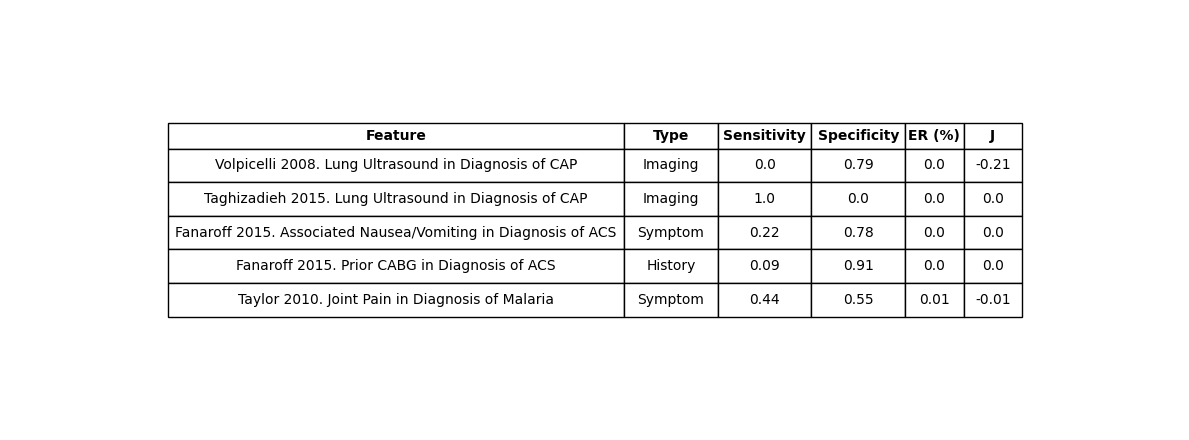

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#Sample data for a sample table; insert your own & repeat for as many tables you like
data = {
    "Feature": [
        "Volpicelli 2008. Lung Ultrasound in Diagnosis of CAP",
        "Taghizadieh 2015. Lung Ultrasound in Diagnosis of CAP",
        "Fanaroff 2015. Associated Nausea/Vomiting in Diagnosis of ACS",
        "Fanaroff 2015. Prior CABG in Diagnosis of ACS",
        "Taylor 2010. Joint Pain in Diagnosis of Malaria"
    ],
  #Columns, insertions; change them here
    "Type": ["Imaging", "Imaging", "Symptom", "History", "Symptom"],
    "Sensitivity": [0.0, 1.0, 0.22, 0.09, 0.44],
    "Specificity": [0.79, 0.0, 0.78, 0.91, 0.55],
    "ER (%)": [0.00, 0.00, 0.00, 0.00, 0.01],
    "J": [-0.21, 0.0, 0.0, 0.0, -0.01]
}

df = pd.DataFrame(data)

#Set column widths manually, according to what looks best to you & your data
col_widths = [0.39, 0.08, 0.08, 0.08, 0.05, 0.05]

fig, ax = plt.subplots(figsize=(12, 2 + len(df) * 0.5))
ax.axis('off')

table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center',
    colWidths=col_widths
)

table.auto_set_font_size(False)
table.set_fontsize(10)

#Change border line width, color
for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(1)
    if row == 0:
        cell.set_text_props(weight='bold')
        cell.set_height(0.06)
    else:
        cell.set_height(0.08)

#Save output as clean PNG
plt.tight_layout()
plt.savefig("low_accuracy_low_info_table_final.png", dpi=300)
plt.show()